In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [2]:
# data path
IMAGES = "saved_datasets/static_cube/images/"
LABELS = "saved_datasets/static_cube/labels.txt"

In [3]:
# Load data
y_values = np.loadtxt(LABELS, dtype=np.float32)
x_values = np.empty(shape=(len(y_values), 128, 128), dtype=np.float32)
for i in range(len(y_values)):
    x_values[i] = io.imread(f"{IMAGES}{i}.png", as_gray=True)

x_values = x_values.reshape(-1, 128*128)

# x_values = np.zeros((1000, 128*128))
# x_values[:, 0] = np.random.rand(1000)
# y_values = x_values[:, 0] * 12 + 2

# x_values = x_values.astype(np.float32)
# y_values = y_values.astype(np.float32)

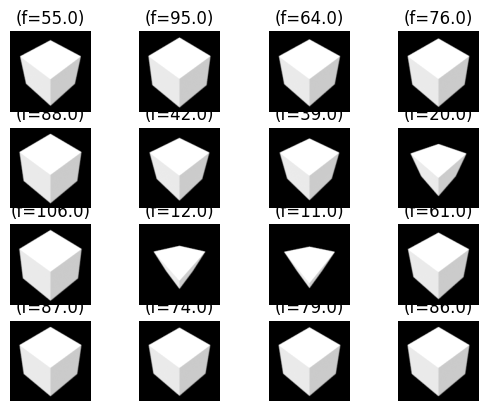

In [4]:
# preview data
for i, image, label in zip(range(16), x_values, y_values):
    ax = plt.subplot(4, 4, i + 1)
    ax.set_title(f'(f={label})')
    ax.axis('off')
    plt.imshow(image.reshape(128, 128), cmap='gray')

plt.show()

In [5]:
# split data into train and test
split = int(len(x_values) * 0.8)
x_train, x_test = x_values[:split], x_values[split:]
y_train, y_test = y_values[:split], y_values[split:]

In [6]:
# model
class MLPRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLPRegression, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, output_size),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layers(x)


In [7]:
# hyperparameters
LR = 0.1
EPOCHS = 100

In [8]:
# init model
simple_cube_model = MLPRegression(input_size=128*128, output_size=1)

simple_cube_model.cuda()

loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(simple_cube_model.parameters(), lr=LR)

In [9]:
# train model
for epoch in range(EPOCHS):
    inputs = Variable(torch.from_numpy(x_train).cuda())
    labels = Variable(torch.from_numpy(y_train).cuda())

    optimizer.zero_grad()

    outputs = simple_cube_model(inputs)

    loss = loss_function(outputs, labels)

    loss.backward()

    optimizer.step()

    print(f"Epoch {epoch + 1}/{EPOCHS} Loss: {loss.item():.4f}")

/home/ibraheem/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([800])) that is different to the input size (torch.Size([800, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 1/100 Loss: 64.7169
Epoch 2/100 Loss: 506.7285
Epoch 3/100 Loss: 436.0458
Epoch 4/100 Loss: 173.0340
Epoch 5/100 Loss: 64.9125
Epoch 6/100 Loss: 64.9125
Epoch 7/100 Loss: 64.9125
Epoch 8/100 Loss: 64.9125
Epoch 9/100 Loss: 64.9125
Epoch 10/100 Loss: 64.9125
Epoch 11/100 Loss: 64.9125
Epoch 12/100 Loss: 64.9125
Epoch 13/100 Loss: 64.9125
Epoch 14/100 Loss: 64.9125
Epoch 15/100 Loss: 64.9125
Epoch 16/100 Loss: 64.9125
Epoch 17/100 Loss: 64.9125
Epoch 18/100 Loss: 64.9125
Epoch 19/100 Loss: 64.9125
Epoch 20/100 Loss: 64.9125
Epoch 21/100 Loss: 64.9125
Epoch 22/100 Loss: 64.9125
Epoch 23/100 Loss: 64.9125
Epoch 24/100 Loss: 64.9125
Epoch 25/100 Loss: 64.9125
Epoch 26/100 Loss: 64.9125
Epoch 27/100 Loss: 64.9125
Epoch 28/100 Loss: 64.9125
Epoch 29/100 Loss: 64.9125
Epoch 30/100 Loss: 64.9125
Epoch 31/100 Loss: 64.9125
Epoch 32/100 Loss: 64.9125
Epoch 33/100 Loss: 64.9125
Epoch 34/100 Loss: 64.9125
Epoch 35/100 Loss: 64.9125
Epoch 36/100 Loss: 64.9125
Epoch 37/100 Loss: 64.9125
Epoch 3

In [10]:
simple_cube_model(
    Variable(torch.from_numpy(x_test[0:10]).cuda()),
),y_test[0:10]

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]], device='cuda:0', grad_fn=<ReluBackward0>),
 array([ 67.,  40.,  39.,  15., 105.,  50., 105.,  76.,  20.,  42.],
       dtype=float32))